# Outliers

Los outliers son datos que suelen ser muy distintos al resto de los datos.

Un dato puede llegar a ser un outlier por varios motivos:
* Dato erroneo
    * Ingreso manual incorrecto
    * Ruido en medicion electronica
    * Scrap erroneo
 
* Dato falsificado
* Resultado improbable

## Como detectarlos?

Dos metodos sencillos que sirven para detectar outliers de una poblacion normalmente distribuida son:
* Distancia Interquantil
* z-score

### Distancia Interquantil (Metodo Tukey)

1. Determinar Q1 y Q3
2. IQR = Q3 - Q1
3. Umbral Menor = Q1 - k * IQR
4. Umbral Mayor = Q3 + k * IQR
5. Los puntos menores al Umbral Menor y los mayores al Umbral Mayor se pueden considerar **outliers**

Cuando se grafica un *boxplot* los "bigotes" corresponden a un k = 1.5

### Metodo z-score

1. Calcular el promedio (mean)
2. Calcular la desviacion estandard (std)
3. Transformar los datos:  (dato - mean)/std
4. Elegir un umbral para buscar outliers

<img src="Imagenes/1280px-The_Normal_Distribution.svg.png" width='80%'>

Datos cuyos z-score esten debajo de -2 o mayor a 2 se los podria considerar como outliers.  El 95% de los datos tienen un z-score entre -2 y 2

Si se desea descartar menos del 1%, entonces el umbral del z-score seria 2.58

## Visualmente

### Boxplot

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
datos = np.random.normal(0,1,1000)

In [11]:
a = datos.std()

(-4, 4)

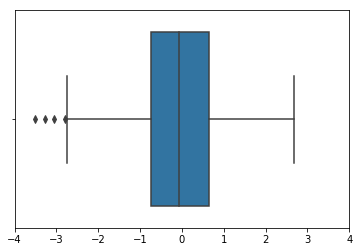

In [13]:
sns.boxplot(x=datos)
plt.xlim(-4, 4)

In [14]:
Q1 = np.percentile(datos, 25)
Q3 = np.percentile(datos, 75)
IQR = Q3 - Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
print("Umbral menor: ", Q1 - IQR*1.5)
print("Umbral mayor: ", Q3 + IQR*1.5)

Q1:  -0.7350597958961573
Q3:  0.6415303699849758
IQR:  1.376590165881133
Umbral menor:  -2.799945044717857
Umbral mayor:  2.7064156188066755


(-4, 4)

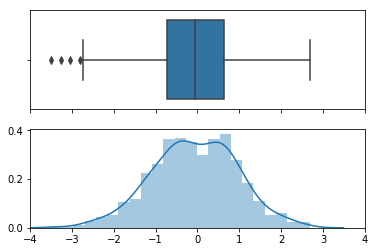

In [16]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = datos, ax=axes[0])
sns.distplot(datos, ax=axes[1])
plt.xlim(-4,4)

## Cuidado !!!

Esta definicion de outliers es util si los datos tienen una distribucion normal. Si no es asi, no se puede decir que los datos que estan "lejos" sean outliers

### Por ejemplo

In [7]:
expo = np.random.exponential(size = 1000)

(0, 8)

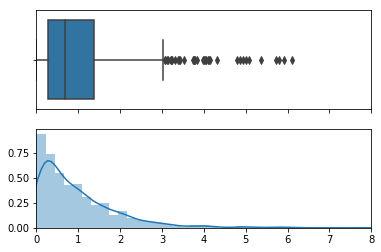

In [8]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = expo, ax=axes[0])
sns.distplot(expo, ax=axes[1])
plt.xlim(0,8)

In [9]:
pois = np.random.poisson(2, size = 1000)
pois[:20]

array([2, 3, 3, 2, 2, 2, 3, 4, 0, 2, 2, 1, 2, 3, 4, 3, 0, 2, 4, 0])

(-2, 10)

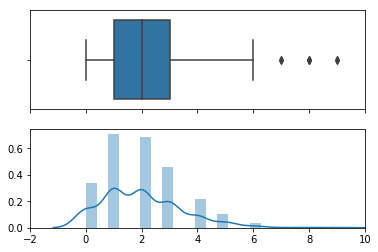

In [10]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = pois, ax=axes[0])
sns.distplot(pois, ax=axes[1])
plt.xlim(-2, 10)

In [11]:
nuevosDatos = np.concatenate( [np.random.normal(10,1,500), np.random.normal(20,1,500)] )

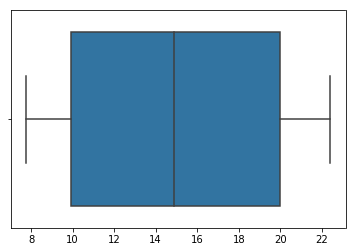

In [12]:
sns.boxplot(nuevosDatos, whis = 1.5)

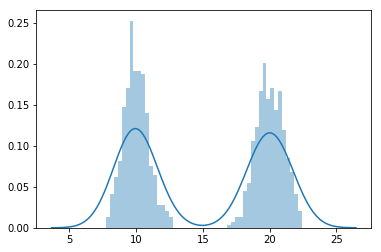

In [13]:
sns.distplot(nuevosDatos, bins=50)

### Outliers multivariados

In [14]:
x = np.sort(np.random.normal(0,10,40))
y = np.sort(np.random.normal(5,36,40))
y[10] = 25

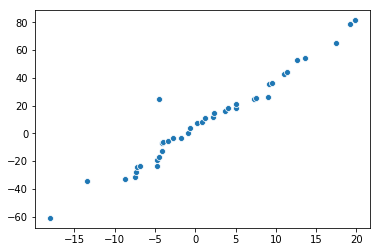

In [15]:
sns.scatterplot(x,y)